## Importing necessary libraries

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Function for adative brightness 

In [2]:
def adaptive_brightness_contrast(input_image):
    
    threshold=26
        
    #converting image to gray scale using openCV 
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram and find the cummulative distribution 
    histogram = cv2.calcHist([gray_image],[0],None,[256],[0,256])
    cummulative = []
    cummulative.append(float(histogram[0]))
    for i in range(1,len(histogram)):
        cummulative.append(cummulative[i-1] + float(histogram[i]))

    # We find the place in the histogram hwere the color frequency is less than the decided threshold 
    max_range = cummulative[-1]
    threshold *= (max_range/100.0)
    threshold /= 2.0

    # We cut the left side of the histogram where frequency is less than this threshold
    minimum_gray = 0
    while cummulative[minimum_gray] < threshold:
        minimum_gray += 1

    # We cut the right side of the histogram where the frequency is greater than the threshold
    maximum_gray = len(histogram) -1
    while cummulative[maximum_gray] >= (max_range - threshold):
        maximum_gray -= 1

    # Alpha is brightness, and Beta is the contrast 
    # Now we calculate alpha and beta values, so that they are in the range [0...255]
    alpha = 255 / (maximum_gray - minimum_gray)
    #
    beta = -minimum_gray * alpha
    
    # Now with the adaptively generated Alph and Beta values we calculate the converted scale image
    converted_scale_img = input_image * alpha + beta
    converted_scale_img[converted_scale_img < 0] = 0
    converted_scale_img[ converted_scale_img > 255] = 255
    adaptive_image= converted_scale_img.astype(np.uint8)    
    
    
    return (adaptive_image, alpha, beta)

## Tesing on Input Images

alpha -----> 3.8059701492537314
beta  -----> -41.865671641791046


Text(0.5, 1.0, 'After')

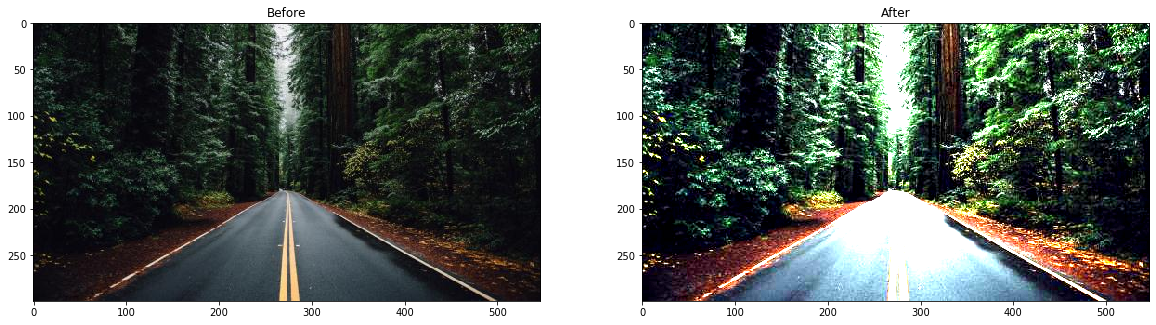

In [3]:
image = cv2.imread('input/input1.jpg')
b,g,r = cv2.split(image)       
rgb_img = cv2.merge([r,g,b]) 
output_image, alpha, beta = adaptive_brightness_contrast(rgb_img)
print('alpha ----->', alpha)
print('beta  ----->', beta)

fig=plt.figure(figsize=(20, 8))
a = fig.add_subplot(1,2, 1)
imgplot = plt.imshow(rgb_img)
a.set_title('Before')
a = fig.add_subplot(1,2, 2)
imgplot = plt.imshow(output_image)
a.set_title('After')

alpha -----> 9.444444444444445
beta  -----> -170.0


Text(0.5, 1.0, 'After')

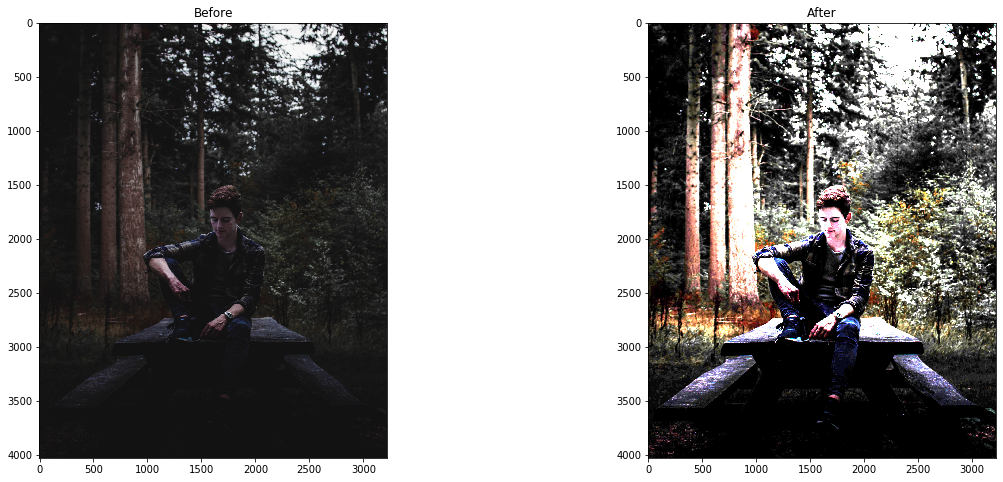

In [4]:
image = cv2.imread('input/input3.jpg')
b,g,r = cv2.split(image)       
rgb_img = cv2.merge([r,g,b])  
output_image, alpha, beta = adaptive_brightness_contrast(rgb_img)
print('alpha ----->', alpha)
print('beta  ----->', beta)

fig=plt.figure(figsize=(20, 8))
a = fig.add_subplot(1,2, 1)
imgplot = plt.imshow(rgb_img)
a.set_title('Before')
a = fig.add_subplot(1,2, 2)
imgplot = plt.imshow(output_image)
a.set_title('After')

alpha -----> 2.3394495412844036
beta  -----> -37.43119266055046


Text(0.5, 1.0, 'After')

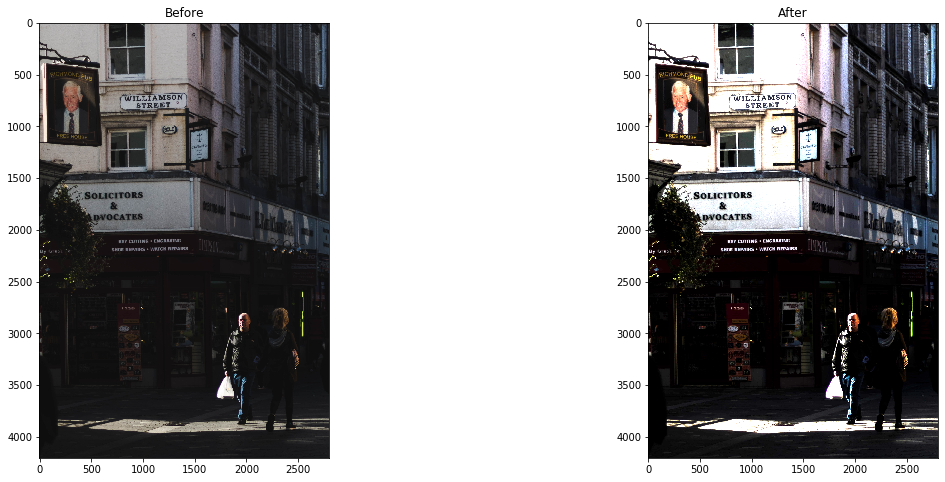

In [5]:
image = cv2.imread('input/input4.jpg')
b,g,r = cv2.split(image)       
rgb_img = cv2.merge([r,g,b])  
output_image, alpha, beta = adaptive_brightness_contrast(rgb_img)
print('alpha ----->', alpha)
print('beta  ----->', beta)

fig=plt.figure(figsize=(20, 8))
a = fig.add_subplot(1,2, 1)
imgplot = plt.imshow(rgb_img)
a.set_title('Before')
a = fig.add_subplot(1,2, 2)
imgplot = plt.imshow(output_image)
a.set_title('After')